In [1]:
# importing modules

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing data from a csv file

df = pd.read_csv("movies.csv")

### cleaning data


In [3]:
# droping missing  values

df = df.dropna()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [5]:
df.shape

(5421, 15)

In [6]:
df.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0


In [7]:
# change data type of columns

df["votes"] = df["votes"].astype(int)
df["budget"] = df["budget"].astype(int)
df["gross"] = df["gross"].astype(int)
df["runtime"] = df["runtime"].astype(int)

In [8]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [9]:
# creating  new correct year for data ( correct_year )


li =list()
for dex,row in enumerate(df["released"]):
    p = row.find("(")
    x = row[:p-1]
    li.append(x)
df["correct_year"] = li
df["correct_year"] = pd.to_datetime(df["correct_year"] )
df.head(2)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980-06-13
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980-07-02


In [10]:
# creating a new year column with correct values (YEAR)

df["YEAR"] = df["correct_year"].astype(str).str[:4]

In [11]:
# deleting the first year column because it was wrong we created the correct one

df = df.drop(columns=["year"])

In [12]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year,YEAR
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980-06-13,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980-07-02,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980-06-20,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980-07-02,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980-07-25,1980


In [13]:
# filtering data with high gross income

df.sort_values(by=["gross"],inplace=True, ascending=False)

In [14]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year,YEAR
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009-12-18,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019-04-26,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997-12-19,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015-12-18,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018-04-27,2018


####  do budgets have a high correlation ?

#### do campanies have a high correlation ?

#### do countries have a high correlation ?

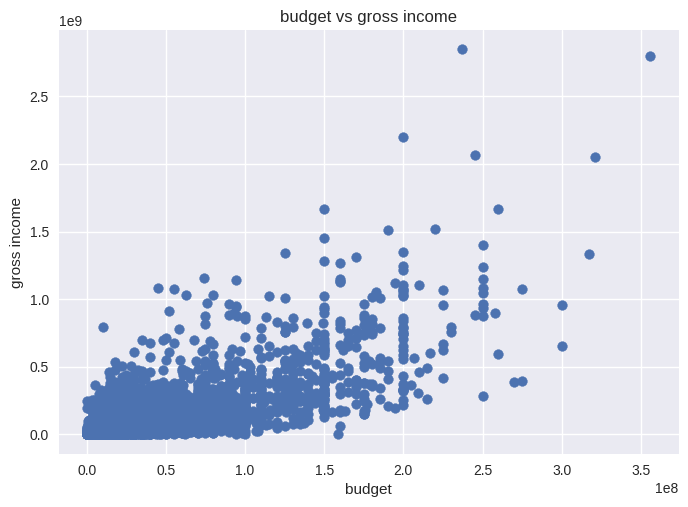

In [15]:
# scatter plot for budgets and gross income

plt.style.use("seaborn")

plt.scatter(x = df["budget"], y = df["gross"])



plt.title("budget vs gross income")
plt.xlabel("budget")
plt.ylabel("gross income")

plt.show()

In [16]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year,YEAR
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009-12-18,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019-04-26,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997-12-19,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015-12-18,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018-04-27,2018


<AxesSubplot:xlabel='budget', ylabel='gross'>

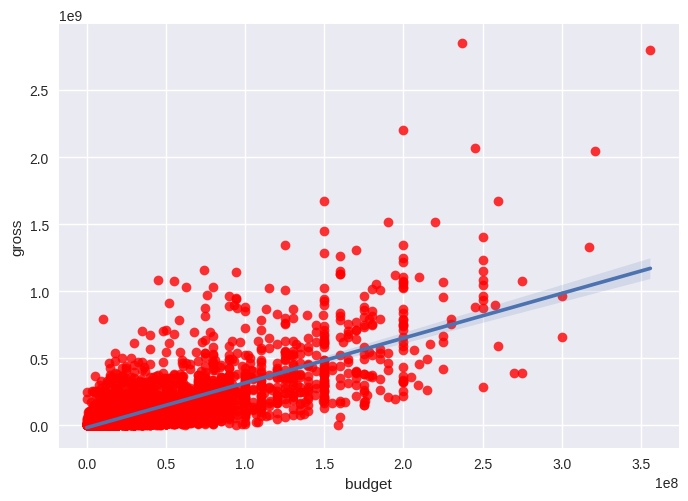

In [17]:
# plot budget with gross income useing seaborn

sns.regplot(x="budget", y ="gross", data=df,scatter_kws={"color":"red"})


In [18]:
# quit looking at correlation for data with statistic correlation matrix

df.corr()

,score,votes,budget,gross,runtime
score,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.414068,0.352303,0.318695,0.275796,1.000000


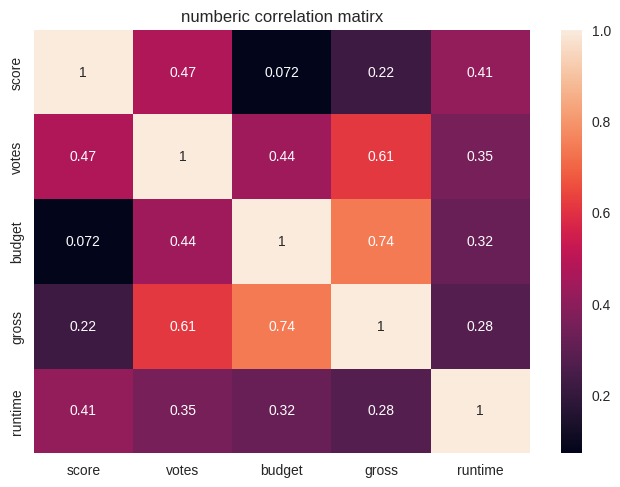

In [19]:
# now I will visualize correlation matrix

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

plt.title("numberic correlation matirx")

plt.show()

In [20]:
# now i will visualize correlation bettwen all data with numeric data type

num_df = df.copy()

for col in num_df.columns:
    if(num_df[col].dtype == "object"):
        num_df[col] = num_df[col].astype("category")
        num_df[col] = num_df[col].cat.codes
        
num_df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year,YEAR
5445,386,5,0,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,2009-12-18,29
7445,388,5,0,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,2019-04-26,39
3045,4909,5,6,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,1997-12-19,17
6663,3643,5,0,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,2015-12-18,35
7244,389,5,0,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,2018-04-27,38


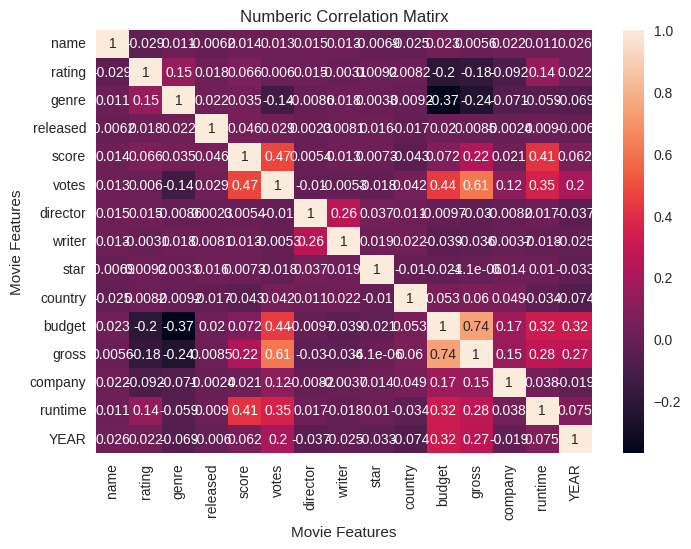

In [21]:
mat = num_df.corr()
sns.heatmap(mat, annot=True)
plt.title("Numberic Correlation Matirx")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [22]:
# lets have a look at correlations in unstack way

unstack = mat.unstack()
unstack

name  name        1.000000
      rating     -0.029234
      genre       0.010996
      released   -0.006152
      score       0.014450
                    ...   
YEAR  budget      0.320312
      gross       0.268721
      company    -0.018806
      runtime     0.075294
      YEAR        1.000000
Length: 225, dtype: float64

In [23]:
sorted_unstack = unstack.sort_values(ascending=True)
sorted_unstack

budget    genre      -0.368523
genre     budget     -0.368523
          gross      -0.244101
gross     genre      -0.244101
rating    budget     -0.203946
                        ...   
released  released    1.000000
genre     genre       1.000000
rating    rating      1.000000
runtime   runtime     1.000000
YEAR      YEAR        1.000000
Length: 225, dtype: float64

In [24]:
high_corr = sorted_unstack[(sorted_unstack> 0.5) & (sorted_unstack < 1)]
high_corr

votes   gross     0.614751
gross   votes     0.614751
budget  gross     0.740247
gross   budget    0.740247
dtype: float64

### budget and votes has the highest correlation to gross earning for movies
### company and country was not in the high correlation list

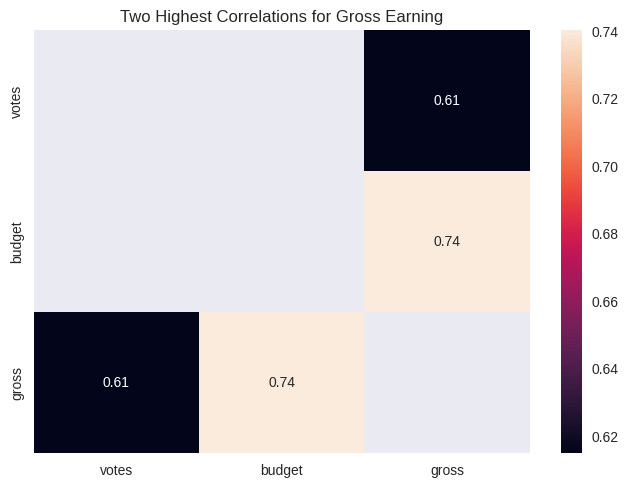

In [25]:
high = mat[(mat > 0.5) & (mat < 1)]
high = high.dropna(how="all")
high = high.dropna(how ="all" , axis=1)
sns.heatmap(high, annot=True)
plt.title("Two Highest Correlations for Gross Earning")
plt.show()